In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 7.10A
We used the linear regression package to construct the residual graph of the fitted values vs. the residuals. This is done in the original coordinates of the dataset.

Parameters:  0.977210661741

Parameters:  [ -6.95171351e+01   1.78181867e+00   1.55090402e-01   1.89135439e-01
  -4.81837053e-01  -2.93123483e-02   6.61441244e-01   3.17846448e-01
   4.45890184e-01   2.97212313e-01  -9.19562670e-01]


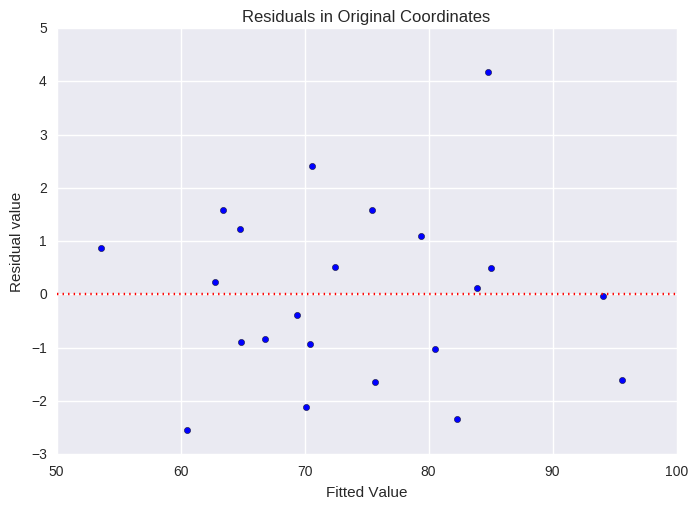

In [6]:
p_d = pd.read_csv('physical.txt',sep='\t',header=0)

# This line constructs the linear regression. Mass is a function of Fore + Bicep + ...
# Result just calculates the coefficents and the Intercept along with 
# R value among other things.
result = smf.ols(formula='Mass ~ Fore + Bicep + Chest + Neck + Shoulder + Waist + Height + Calf + Thigh + Head', data=p_d).fit()


print('Parameters: ', result.rsquared)
print()
print('Parameters: ', result.params.values)

# vals_zero is just a dictionary that contains the coefficents. I'm constructing the prediction(s).
vals_zero = result.params
pred = vals_zero['Intercept'] + (p_d['Fore'] * vals_zero['Fore']) + (p_d['Bicep'] * vals_zero['Bicep']) +  (p_d['Chest'] * vals_zero['Chest']) \
+ (p_d['Neck'] * vals_zero['Neck']) + (p_d['Shoulder'] * vals_zero['Shoulder']) + (p_d['Waist'] * vals_zero['Waist']) + (p_d['Height'] * vals_zero['Height']) \
+ (p_d['Calf'] * vals_zero['Calf']) + (p_d['Thigh'] * vals_zero['Thigh']) + (p_d['Head'] * vals_zero['Head'])

plt.figure()

# Draws a horizontal line across the graph at y=0
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred, p_d['Mass'] - pred) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Original Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()

## 7.10B
Construct a new dataframe by taking the cube root of the mass. I then regress the cube root of these diameters. I then construct two residuals in both the cube root coordinates and in the original coordinates.

Parameters:  0.975847620621

Parameters:  [  1.11922878e+00   2.79718943e-02   4.14371304e-03   1.05188684e-03
  -2.53206076e-03   8.10026998e-04   1.11523281e-02   5.77383070e-03
   1.06564548e-02   7.91884117e-03  -1.24520118e-02]


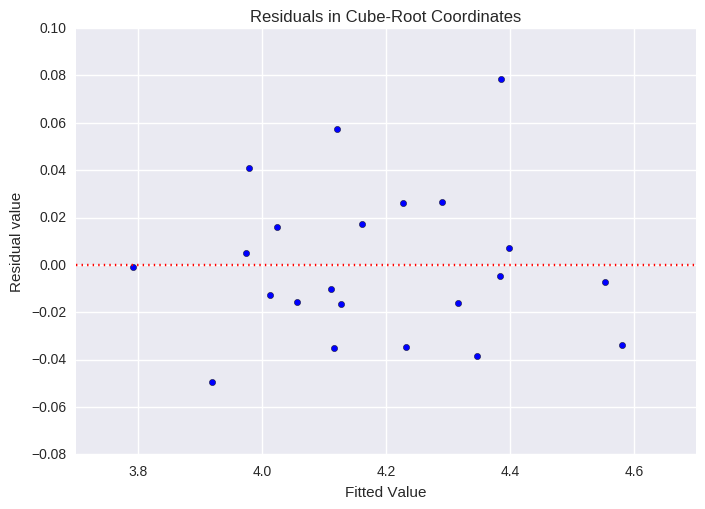

In [5]:
cbr = lambda x : np.power(x, 1/3)
mod_df = p_d.copy(deep=True)
# Applies the cube root to the data
mod_df['Mass'] = mod_df['Mass'].apply(cbr)

# This line constructs the linear regression. Mass is a function of Fore + Bicep + ...
# Result just calculates the coefficents and the Intercept along with 
# R value among other things.
result = smf.ols(formula='Mass ~ Fore + Bicep + Chest + Neck + Shoulder + Waist + Height + Calf + Thigh + Head', data=mod_df).fit()

print('Parameters: ', result.rsquared)
print()
print('Parameters: ', result.params.values)

# vals_zero is just a dictionary that contains the coefficents. I'm constructing the prediction(s).
vals = result.params.values
pred = vals[0] + mod_df['Fore'] * vals[1] +  mod_df['Bicep'] * vals[2] + mod_df['Chest'] * vals[3] \
+ mod_df['Neck'] * vals[4] + mod_df['Shoulder'] * vals[5] + mod_df['Waist'] * vals[6] + mod_df['Height'] * vals[7] \
+ mod_df['Calf'] * vals[8] + mod_df['Thigh'] * vals[9] + mod_df['Head'] * vals[10]

plt.figure()

# Draws a horizontal line across the graph at y=0
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred, mod_df['Mass'] - pred) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Cube-Root Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()

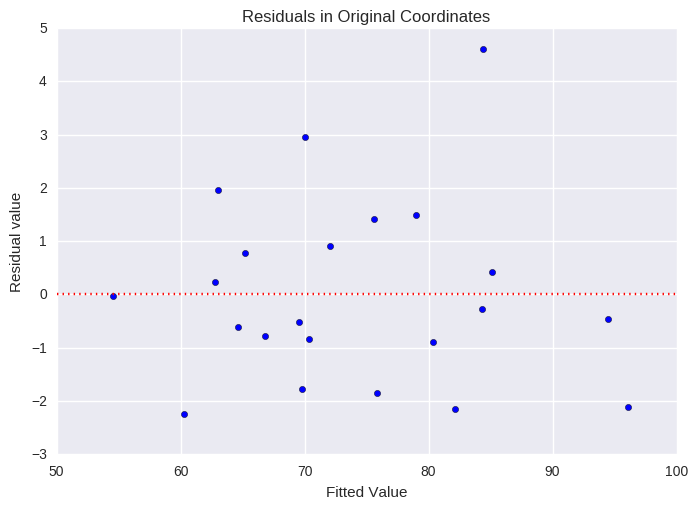

In [4]:
pred = vals[0] + mod_df['Fore'] * vals[1] +  mod_df['Bicep'] * vals[2] +  mod_df['Chest'] * vals[3] \
+ mod_df['Neck'] * vals[4] + mod_df['Shoulder'] * vals[5] + mod_df['Waist'] * vals[6] + mod_df['Height'] * vals[7] \
+ mod_df['Calf'] * vals[8] + mod_df['Thigh'] * vals[9] + mod_df['Head'] * vals[10]

pred2 = np.power(pred.values, 3)

plt.figure()

# Draws a horizontal line across the graph at y=0
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred2, p_d['Mass'] - pred2) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Original Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()

## 7.10C

## Analysis

Given the two plots, it seems that both regressions lead to similar output. The cube root transformation does not apply much change to the residual plot. Both seem to have random residual values, which leads us to believe that it is a good regression.